Transformasi Twirl

In [ ]:
import matplotlib.pyplot as plt
from skimage import data
from skimage.transform import swirl

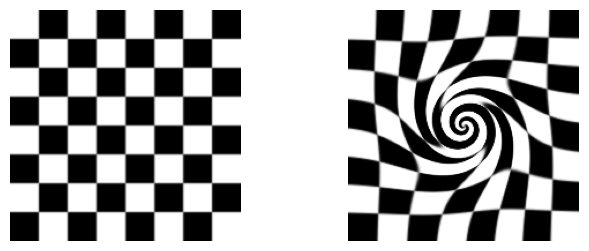

In [ ]:
# Menghasilkan gambar pola kotak-kotak (checkerboard)
image = data.checkerboard()

# Melakukan transformasi swirl pada gambar
swirled = transform.swirl(image, rotation=0, strength=10, radius=120)

# Membuat sebuah figure dengan dua subplot
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(8, 3), sharex=True, sharey=True)

# Menampilkan gambar asli pada subplot pertama
ax0.imshow(image, cmap=plt.cm.gray)
ax0.axis('off')

# Menampilkan gambar yang telah di-transformasi swirl pada subplot kedua
ax1.imshow(swirled, cmap=plt.cm.gray)
ax1.axis('off')

# Menampilkan figure dengan kedua subplot
plt.show()


Translation

In [21]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

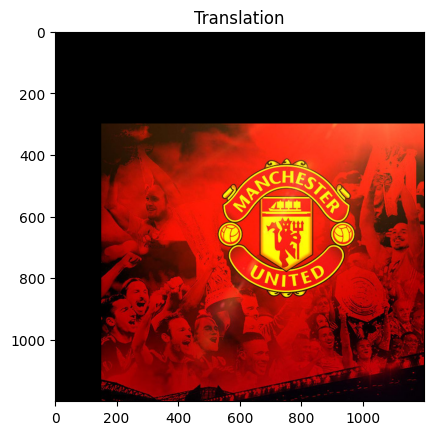

In [23]:
# Membaca gambar "MU.jpg"
image = cv.imread("MU.jpg")

# Mendapatkan tinggi (h) dan lebar (w) dari gambar
h, w = image.shape[:2]

# Menghitung setengah tinggi dan setengah lebar gambar
half_height, half_width = h // 4, w // 8

# Membuat matriks transisi untuk translasi
transition_matrix = np.float32([[1, 0, half_width], [0, 1, half_height]])

# Melakukan translasi pada gambar menggunakan warpAffine
img_transition = cv.warpAffine(image, transition_matrix, (w, h))

# Menampilkan gambar yang sudah ditranslasikan
plt.imshow(cv.cvtColor(img_transition, cv.COLOR_BGR2RGB))
plt.title("Translasi")
plt.show()


Rotation

In [ ]:
import cv2 as cv 
import numpy as np
import matplotlib.pyplot as plt 

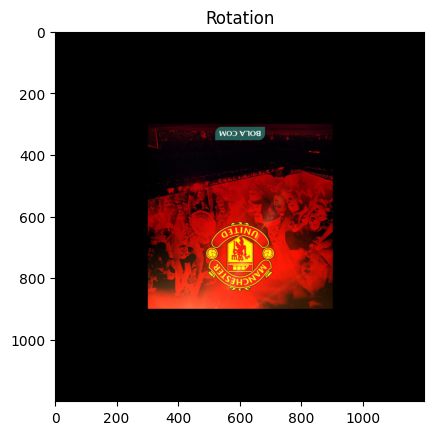

In [ ]:
# Membaca gambar "MU.jpg"
image = cv.imread("MU.jpg")

# Mendapatkan tinggi (h) dan lebar (w) dari gambar
h, w = image.shape[:2]

# Menghitung matriks rotasi untuk rotasi gambar
rotation_matrix = cv.getRotationMatrix2D((w/2, h/2), -180, 0.5)

# Melakukan rotasi gambar menggunakan warpAffine
rotated_image = cv.warpAffine(image, rotation_matrix, (w, h))

# Menampilkan gambar yang sudah dirotasi
plt.imshow(cv.cvtColor(rotated_image, cv.COLOR_BGR2RGB))
plt.title("Rotasi")
plt.show()


Interpolation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure

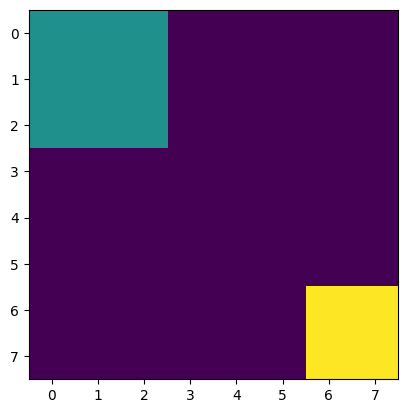

In [ ]:
# Membuat array boolean dengan ukuran 8x8 dan menginisialisasi dengan nilai False (0)
regions = np.zeros((8, 8), dtype=bool)

# Memberi nilai True (1) pada wilayah pertama berukuran 3x3
regions[:3, :3] = 1

# Memberi nilai True (1) pada wilayah terakhir berukuran 3x3
regions[6:, 6:] = 1

# Melakukan proses labeling pada wilayah-wilayah yang ada dalam citra
labeled = measure.label(regions)

# Menampilkan citra dengan label menggunakan imshow
plt.imshow(labeled, interpolation='nearest')

# Menampilkan citra yang telah diberi label
plt.show()


In [ ]:
# Membuat sebuah elemen struktur persegi berukuran 3x3 dengan nilai True (1)
structuring_element = np.ones((3, 3), dtype=bool)

# Melakukan proses labeling pada wilayah-wilayah yang ada dalam citra 'regions'
labeled = measure.label(regions, connectivity=structuring_element)

In [ ]:
# Menghitung properti wilayah pada hasil labeling
properties = measure.regionprops(labeled)

# Mengambil ukuran atau luas wilayah
sizes = [prop.area for prop in properties]

# Menampilkan ukuran background (wilayah 0) dan ukuran wilayah pertama (wilayah 1)
print('Ukuran background:', sizes[0])
print('Ukuran wilayah pertama:', sizes[1])

Background size: 9
Size of first region: 4


In [ ]:
# Membuat array dengan nilai acak berukuran sama dengan 'regions'
array = np.random.random_sample(regions.shape)

# Menghitung properti wilayah dengan menggunakan citra intensitas 'array'
sums = measure.regionprops(labeled, intensity_image=array)

# Mengambil jumlah total intensitas piksel dalam wilayah pertama (wilayah 0)
print('Jumlah wilayah pertama:', sums[0].intensity_image.sum())

Sum of first region: 4.786762364304886


Skala Interpolasi Miring

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt 

Text(0.5, 1.0, 'Skewed Interpolation Scale')

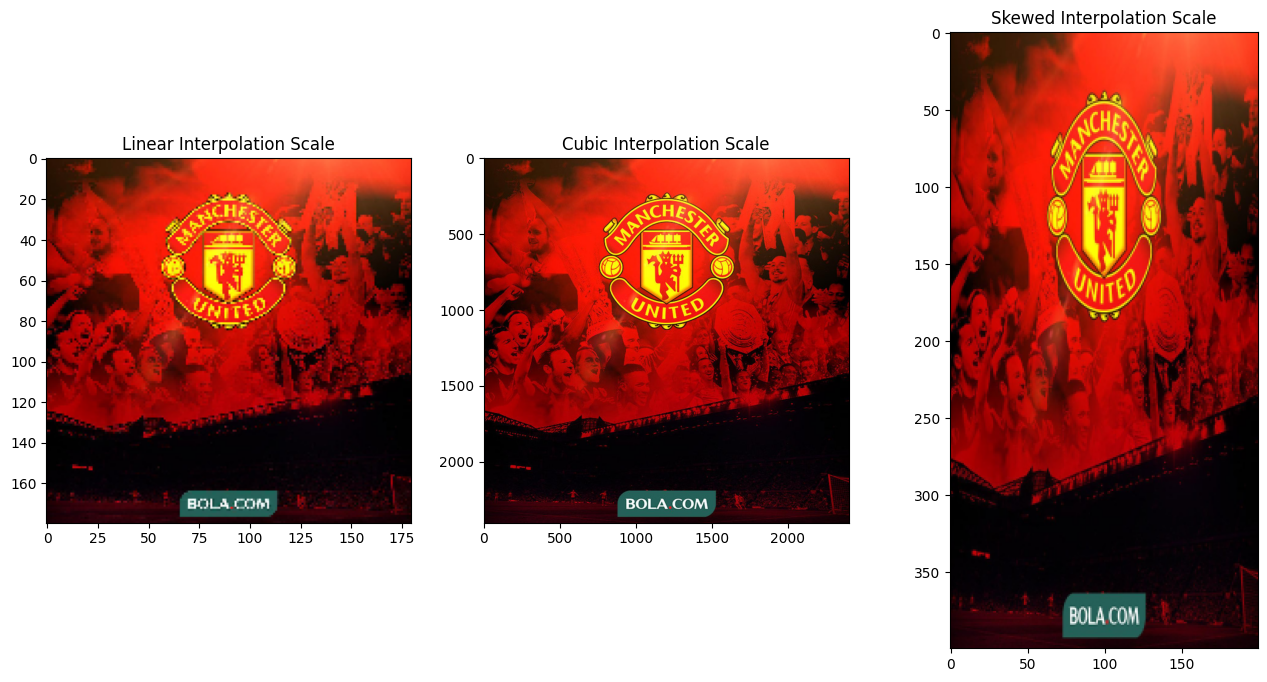

In [ ]:
# Memuat citra "kucing.jpg" menggunakan OpenCV
image = cv.imread("kucing.jpg")

# Membuat subplot dengan 1 baris dan 3 kolom, dan ukuran gambar 16x8
fig, ax = plt.subplots(1, 3, figsize=(16, 8))

# Penskalaan ukuran citra menggunakan interpolasi linier
image_scaled = cv.resize(image, None, fx=0.15, fy=0.15)
ax[0].imshow(cv.cvtColor(image_scaled, cv.COLOR_BGR2RGB))
ax[0].set_title("Skala Interpolasi Linier")

# Penskalaan ukuran citra menggunakan interpolasi kubik
image_scaled_2 = cv.resize(image, None, fx=2, fy=2, interpolation=cv.INTER_CUBIC)
ax[1].imshow(cv.cvtColor(image_scaled_2, cv.COLOR_BGR2RGB))
ax[1].set_title("Skala Interpolasi Kubik")

# Penskalaan ukuran citra menggunakan interpolasi area
image_scaled_3 = cv.resize(image, (200, 400), interpolation=cv.INTER_AREA)
ax[2].imshow(cv.cvtColor(image_scaled_3, cv.COLOR_BGR2RGB))
ax[2].set_title("Skala Interpolasi Tergores")

# Menampilkan subplot
plt.show()